In [1]:
import pyfiles.HFSAnalyzer as HFSA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import time
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSA.directory_to_df('../archive/logfiles')
df.to_pickle("HFSDataFrame.pickle")

#df = HFSA.add_Dir_to_pickle_df("HFSDataFrame.pickle", dirname='../HFS/log', moveto='../archive/logfiles')
df3D = df[df['ndim'] == 3]
df3D = df3D[np.isfinite(df3D['Dav_final_val'])]
df2D = df[df['ndim'] == 2]

In [83]:
'''
reload(HFSA)
fig = plt.figure(figsize=(7,7))
axplot = HFSA.axplot_1stBZ
kwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}
fig, axes = HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot, **kwargs)
plt.tight_layout()
#fig.tight_layout(pad=1.3)
plt.savefig('../images/1stBZ.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure(figsize=(7,7))
axplot = HFSA.axplot_exc_hist
fig, axes =  HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot)
plt.tight_layout()
fig.tight_layout(pad=1.3)
plt.locator_params(nbins=5)
plt.savefig('../images/exchist.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure(figsize=(7,7))
HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, HFSA.axplot_energy_compare)
plt.tight_layout()
#fig.tight_layout(pad=1.3)
plt.savefig('../images/energycompare.eps', format='eps', transparent=True)
plt.show()
'''

"\nreload(HFSA)\nfig = plt.figure(figsize=(7,7))\naxplot = HFSA.axplot_1stBZ\nkwargs = {'spec_alpha' : 0.5 , 'scale' : 1.05, 'labels' : True}\nfig, axes = HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot, **kwargs)\nplt.tight_layout()\n#fig.tight_layout(pad=1.3)\nplt.savefig('../images/1stBZ.eps', format='eps', transparent=True)\nplt.show()\n\nfig = plt.figure(figsize=(7,7))\naxplot = HFSA.axplot_exc_hist\nfig, axes =  HFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, axplot)\nplt.tight_layout()\nfig.tight_layout(pad=1.3)\nplt.locator_params(nbins=5)\nplt.savefig('../images/exchist.eps', format='eps', transparent=True)\nplt.show()\n\nfig = plt.figure(figsize=(7,7))\nHFSA.df_ApplyAxplotToRows(df[df['Nk'] == 57], None, HFSA.axplot_energy_compare)\nplt.tight_layout()\n#fig.tight_layout(pad=1.3)\nplt.savefig('../images/energycompare.eps', format='eps', transparent=True)\nplt.show()\n"

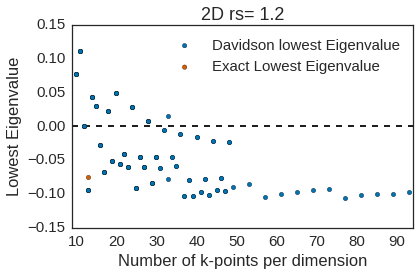

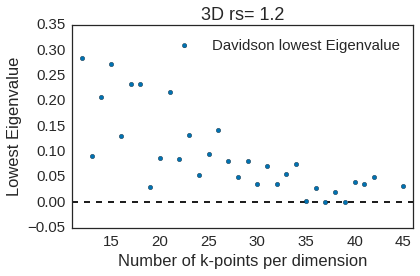

In [84]:
df2D12 = df2D[np.isclose(df2D['rs'].as_matrix(), 1.2)]
df3D12 = df3D[np.isclose(df3D['rs'].as_matrix(), 1.2)]
reload(HFSA)

fig = plt.figure()
HFSA.plot_dav_vs_full(df2D12, fig.gca())
plt.title("2D rs= 1.2")
fig.tight_layout(pad=1.3)
#plt.savefig('../images/dav_vs_exact.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure()
HFSA.plot_dav_vs_full(df3D12, fig.gca())
plt.title("3D rs= 1.2")
fig.tight_layout(pad=1.3)
#plt.savefig('../images/dav_vs_exact.eps', format='eps', transparent=True)
plt.show()

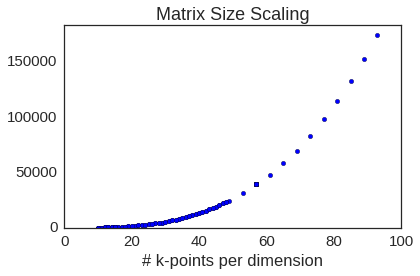

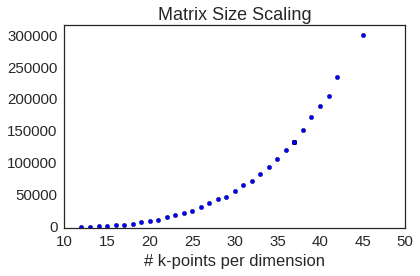

In [85]:
fig = plt.figure()
HFSA.plot_matrix_scaling(df2D, fig.gca())
fig.tight_layout(pad=1.3)
#plt.savefig('../images/matscale.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure()
HFSA.plot_matrix_scaling(df3D, fig.gca())
fig.tight_layout(pad=1.3)
#plt.savefig('../images/matscale.eps', format='eps', transparent=True)
plt.show()

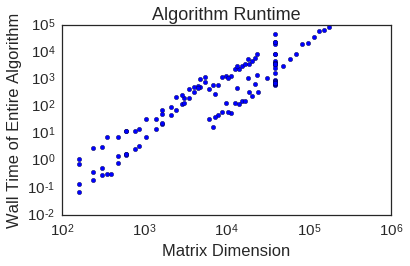

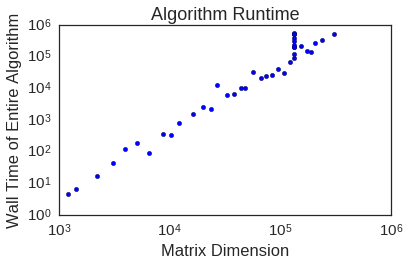

In [86]:
fig = plt.figure()
HFSA.plot_runtime(df2D, plt.gca())
fig.tight_layout(pad=1.8)
#plt.savefig('../images/overallruntime.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure()
HFSA.plot_runtime(df3D, plt.gca())
fig.tight_layout(pad=1.8)
#plt.savefig('../images/overallruntime.eps', format='eps', transparent=True)
plt.show()

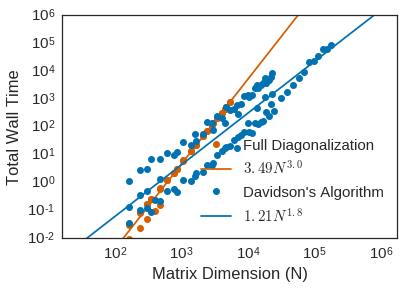

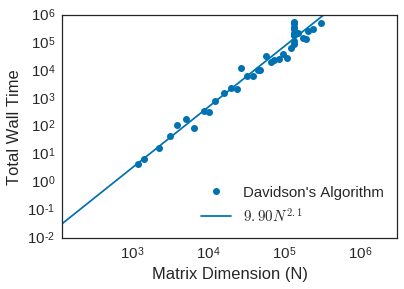

In [87]:
RHF2D = df2D[df2D['mycase'].as_matrix() == ' cRHF2cUHF']
RHF2D12 = RHF2D[np.isclose(RHF2D['rs'].as_matrix(), 1.2)]

fig = plt.figure()
HFSA.plot_diag_scaling(RHF2D12, plt.gca())
#plt.savefig('../images/dav_vs_exact_scaling.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure()
HFSA.plot_diag_scaling(df3D, plt.gca())
#plt.savefig('../images/dav_vs_exact_scaling.eps', format='eps', transparent=True)
plt.show()

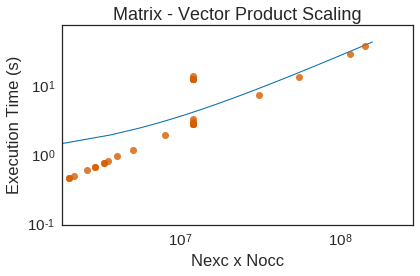

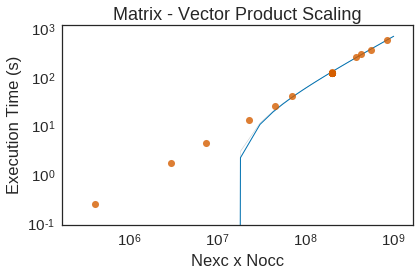

In [88]:
fig = plt.figure()
HFSA.plot_mvproduct_scaling(df2D, plt.gca())
fig.tight_layout(pad=1.3)
#plt.savefig('../images/mvscaling.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure()
HFSA.plot_mvproduct_scaling(df3D, plt.gca())
fig.tight_layout(pad=1.3)
#plt.savefig('../images/mvscaling.eps', format='eps', transparent=True)
plt.show()

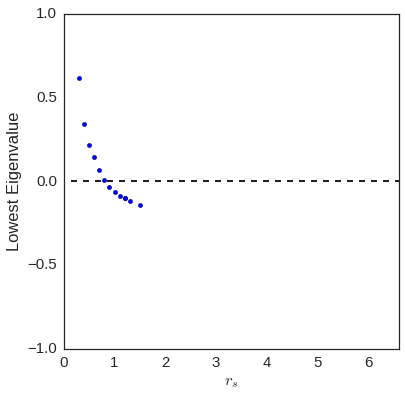

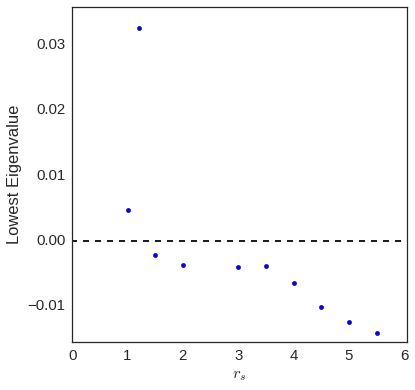

In [89]:
def only_max_Nk(df):
    """For each unique rs, find the row of maximum Nk and return the corresponding dataframe."""
    rsvals = df['rs'].unique()
    idx = []
    for rs in rsvals:
        dfrs = df[np.isclose(df['rs'], rs)]
        index = dfrs['Nk'].idxmax()
        idx.append(index)

    return df.loc[idx]

fig = plt.figure(figsize=(6,6))
HFSA.plot_stability(only_max_Nk(df2D), plt.gca())
plt.ylim(-1,1)
#fig.tight_layout(pad=1.3)
#plt.savefig('../images/stab_rs.eps', format='eps', transparent=True)
plt.show()

fig = plt.figure(figsize=(6,6))
HFSA.plot_stability(only_max_Nk(df3D), plt.gca())
#fig.tight_layout(pad=1.3)
#plt.savefig('../images/stab_rs.eps', format='eps', transparent=True)
plt.show()

In [92]:

dogs = ['1', '2']
for dog in dogs:
    dog = '12'
print dogs

['1', '2']
